#### How to handle Categorical Missing Values

#### Frequent Category Imputation

In [1]:
import pandas as pd
df = pd.read_csv("loan.csv",usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [2]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [3]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [4]:
 df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

#### Compute the frequency with every feature

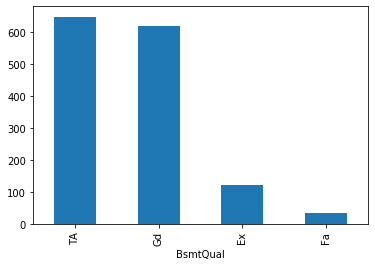

In [5]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

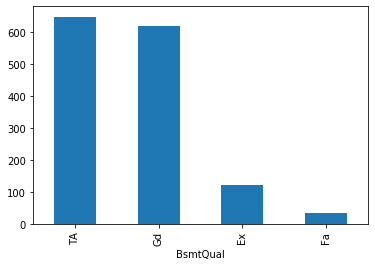

In [6]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

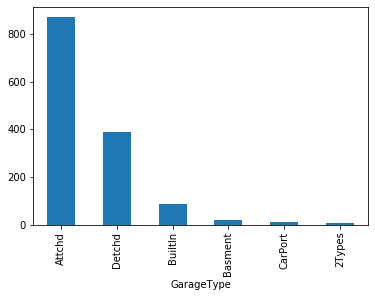

In [7]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar()

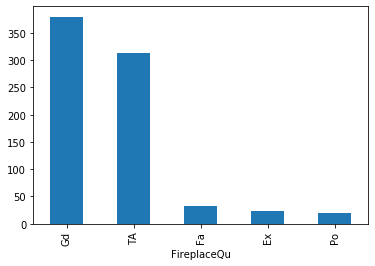

In [8]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending = False).plot.bar()

In [9]:
df.GarageType.value_counts().index[0]

'Attchd'

In [10]:
#### Replacing function
def impute_nan(df,var):
    most_freq_cat = df[var].value_counts().index[0]
    df[var].fillna(most_freq_cat,inplace = True)

In [11]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [12]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [13]:
# We can also use mode to get the occurring element
df['GarageType'].mode()[0]

'Attchd'

#### Advantages : 
1. Easy to implement
2. Faster way to implement

#### Disadvantage :
1. Since we are using more frequent labels it may use them in an overrepresented way if there are many nans.
2. It distorts the relation of the most frequent label

### Adding a variable  to capture NAN

In [14]:
df = pd.read_csv("loan.csv",usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
import numpy as np
df['BsmtQual_var'] = np.where(df.BsmtQual.isnull(),1,0)

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [17]:
freq = df['BsmtQual'].mode()[0]

In [18]:
df['BsmtQual'].fillna(freq)

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [20]:
df['FireplaceQu_var'] = np.where(df.FireplaceQu.isnull(),1,0)
freq_f = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(freq_f,inplace = True)

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories , we just replace NAN with a new category

In [22]:
df1 = pd.read_csv("loan.csv",usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [23]:
def inpute_nan(df1,var1):
    df1[var1] = np.where(df1[var].isnull(),"Missing",df1[var])

In [24]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df1,feature)

In [25]:
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
